In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.shape

(1460, 81)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data = train_data[['SalePrice', 'MSSubClass', 'MSZoning', 'LotArea', 'Utilities', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 'BsmtQual', 'CentralAir', 'TotRmsAbvGrd', 'GarageType']]

In [6]:
train_data.describe()

,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,6.517808
std,79442.502883,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,1.625393
min,34900.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,2.000000
25%,129975.000000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,5.000000
50%,163000.000000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,6.000000
75%,214000.000000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,7.000000
max,755000.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,14.000000


In [7]:
# intital exploration on overall missing values
train_data.isna().sum()

SalePrice        0
MSSubClass       0
MSZoning         0
LotArea          0
Utilities        0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtQual        37
CentralAir       0
TotRmsAbvGrd     0
GarageType      81
dtype: int64

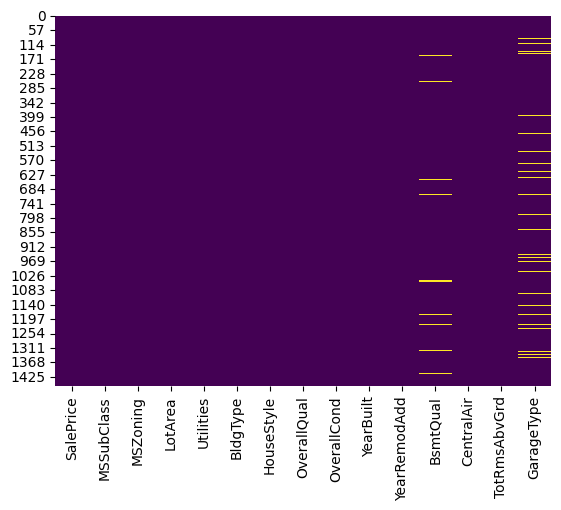

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train_data.isna(), cbar=False, cmap='viridis',)
plt.show()


In [9]:
train_data.drop_duplicates(inplace=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

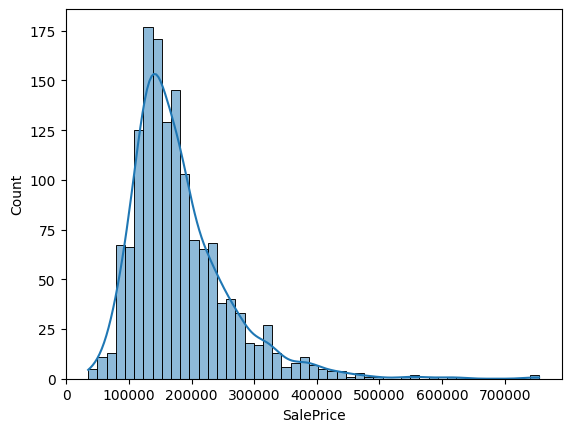

In [10]:
#Visualize variables

# target
sns.histplot(train_data['SalePrice'], kde=True)

In [11]:
train_data['SalePrice'].skew()

# a positive skew 

1.8828757597682129

In [12]:
target = 'SalePrice'
features = list(set(train_data.columns) - set(target))
cat_features = []
num_features = []
def assign_feature_type(x):
    if train_data[x].dtype == object:
        cat_features.append(x)
    else:
        num_features.append(x)

for feature in features:
    assign_feature_type(feature)


In [13]:
cat_features

['GarageType',
 'HouseStyle',
 'BldgType',
 'BsmtQual',
 'MSZoning',
 'Utilities',
 'CentralAir']

In [14]:
num_features

['TotRmsAbvGrd',
 'YearBuilt',
 'OverallQual',
 'MSSubClass',
 'SalePrice',
 'OverallCond',
 'YearRemodAdd',
 'LotArea']

<Axes: >

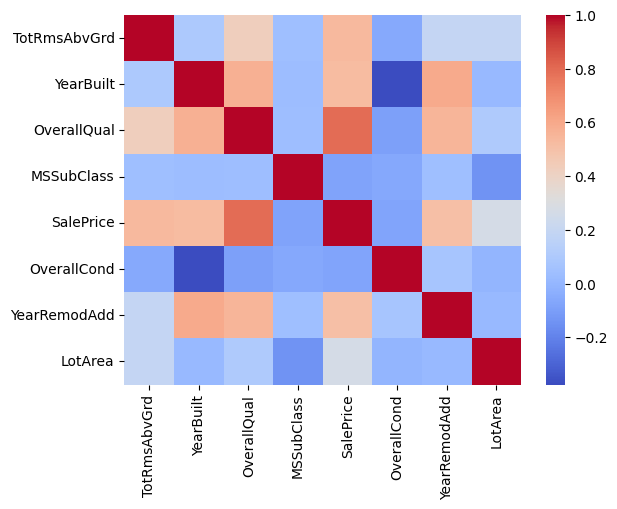

In [15]:
# correlation 
corr_matrix = train_data[num_features].corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm')

In [16]:
corr_matrix.info

<bound method DataFrame.info of               TotRmsAbvGrd  YearBuilt  OverallQual  MSSubClass  SalePrice  \
TotRmsAbvGrd      1.000000   0.095589     0.427452    0.040380   0.533723   
YearBuilt         0.095589   1.000000     0.572323    0.027850   0.522897   
OverallQual       0.427452   0.572323     1.000000    0.032628   0.790982   
MSSubClass        0.040380   0.027850     0.032628    1.000000  -0.084284   
SalePrice         0.533723   0.522897     0.790982   -0.084284   1.000000   
OverallCond      -0.057583  -0.375983    -0.091932   -0.059316  -0.077856   
YearRemodAdd      0.191740   0.592855     0.550684    0.040581   0.507101   
LotArea           0.190015   0.014228     0.105806   -0.139781   0.263843   

              OverallCond  YearRemodAdd   LotArea  
TotRmsAbvGrd    -0.057583      0.191740  0.190015  
YearBuilt       -0.375983      0.592855  0.014228  
OverallQual     -0.091932      0.550684  0.105806  
MSSubClass      -0.059316      0.040581 -0.139781  
SalePrice     

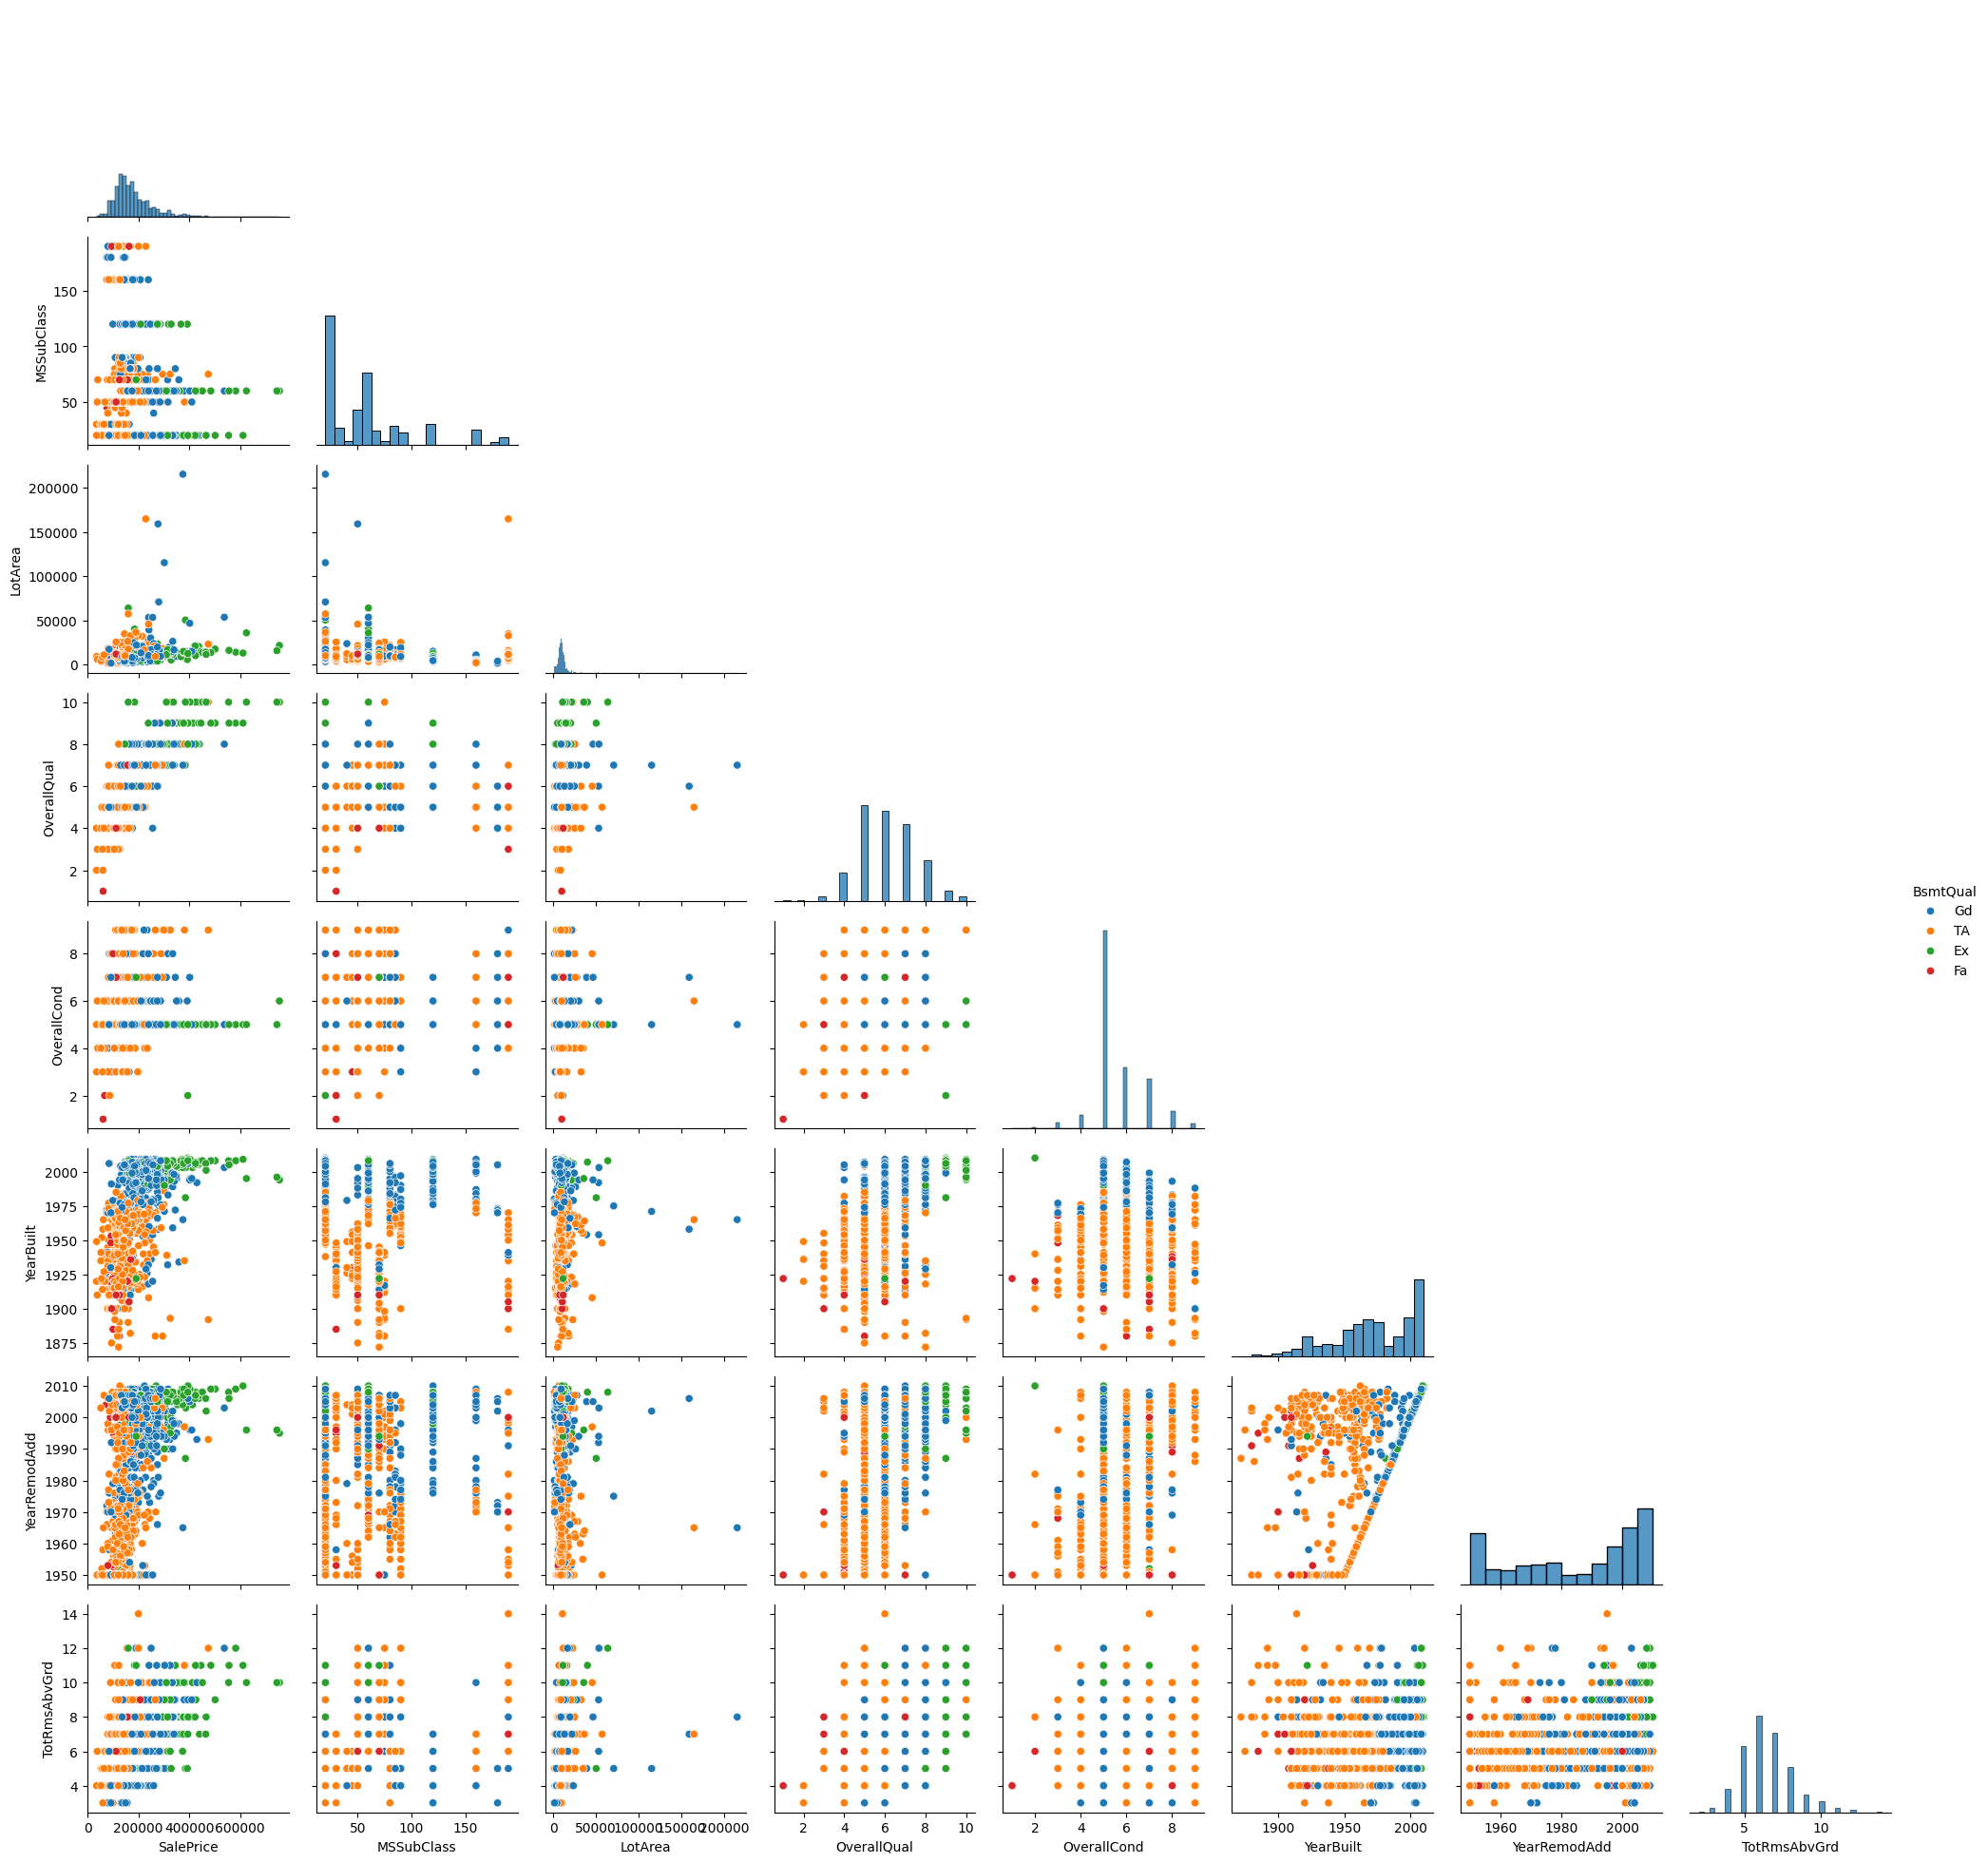

In [17]:
#visualizations
g = sns.PairGrid(train_data, corner=True, hue='BsmtQual')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot, hue=None)
g.add_legend()


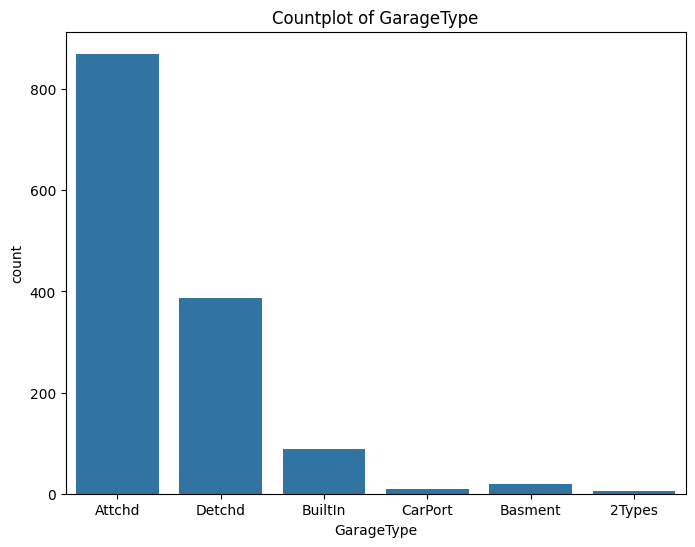

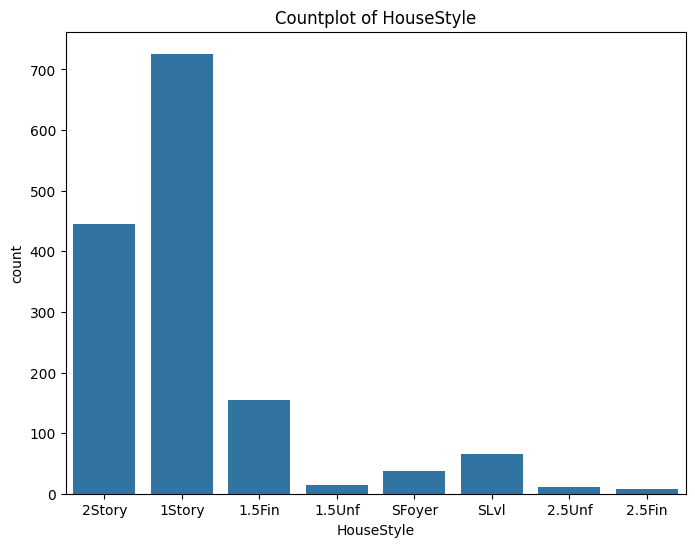

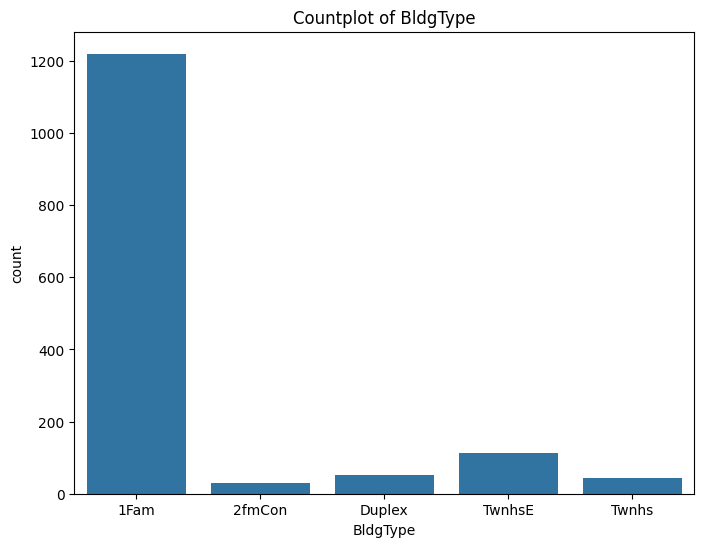

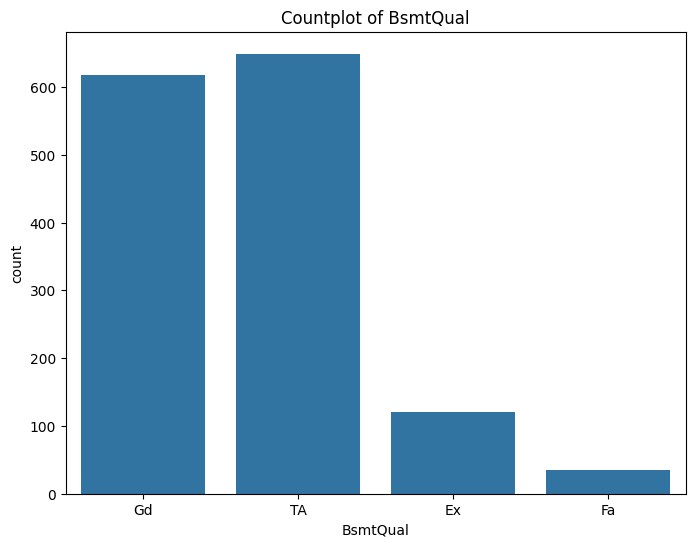

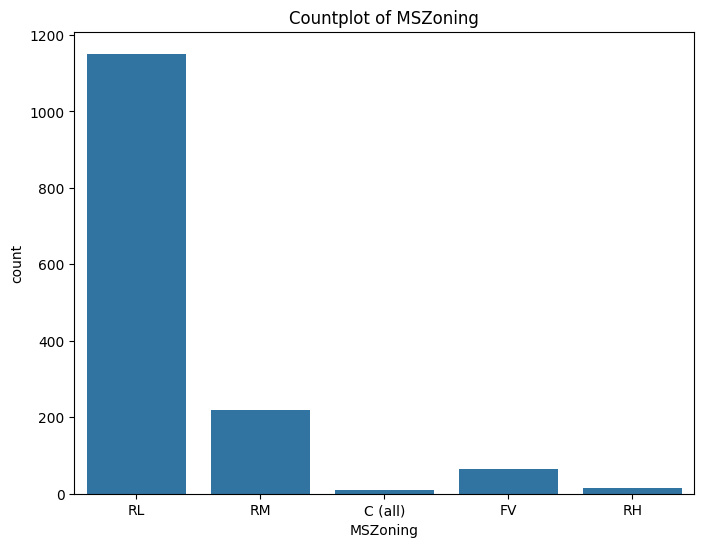

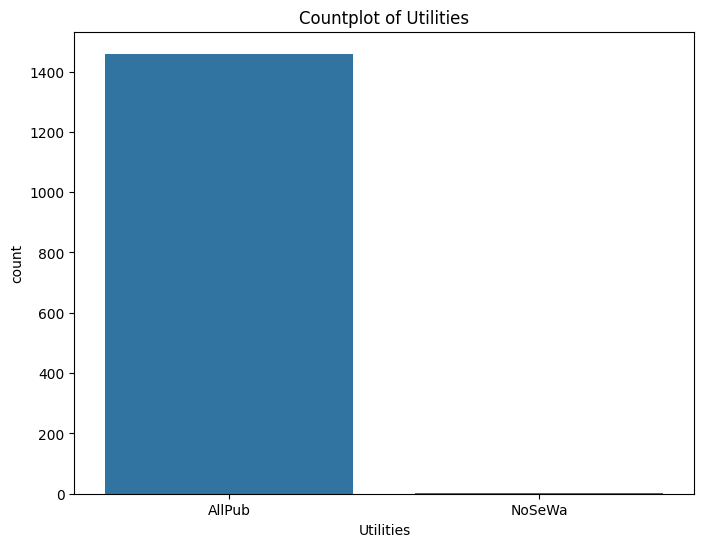

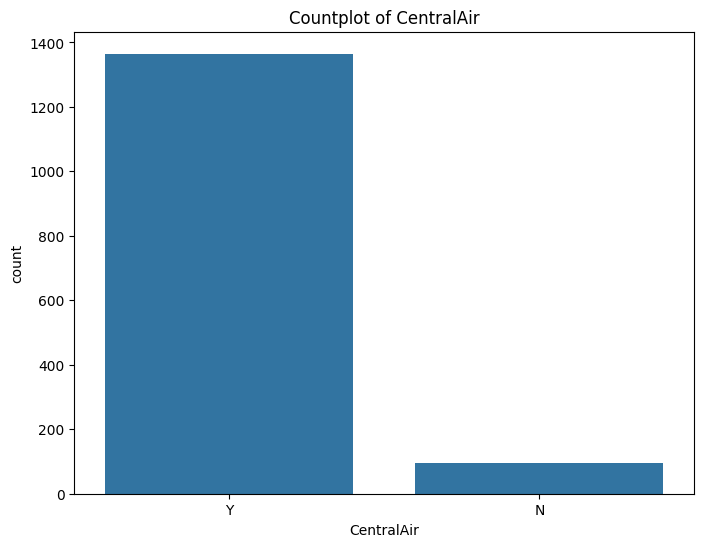

In [18]:
# visualizing categorical features
for axes, cat in enumerate(cat_features):
    plt.figure(figsize=(8,6))
    sns.countplot(train_data, x = cat)
    plt.title(f"Countplot of {cat}")

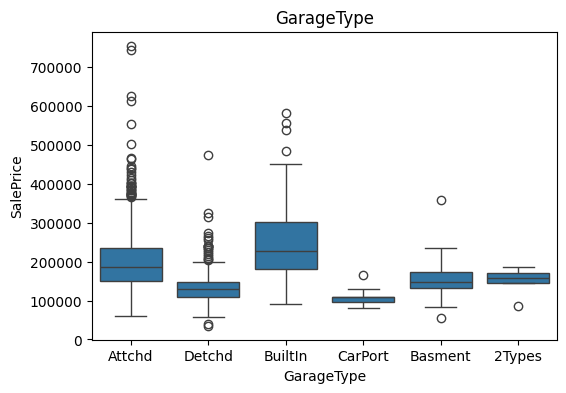

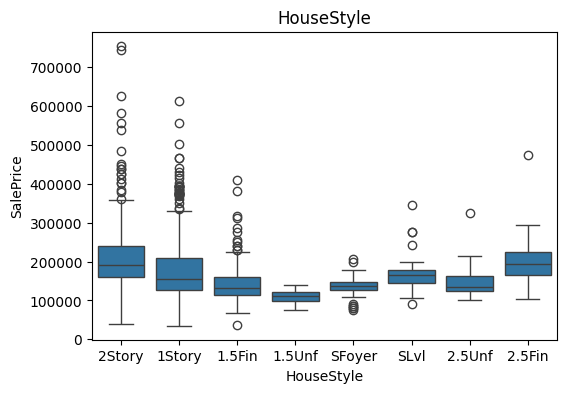

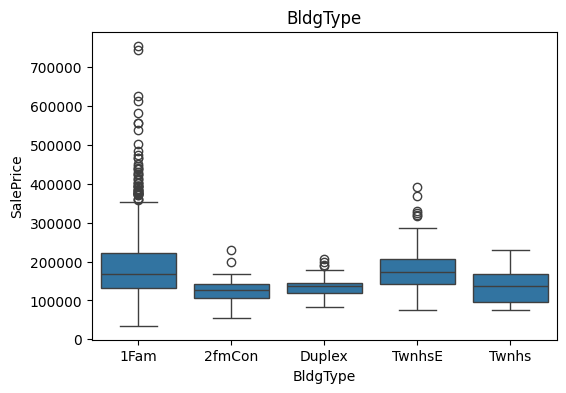

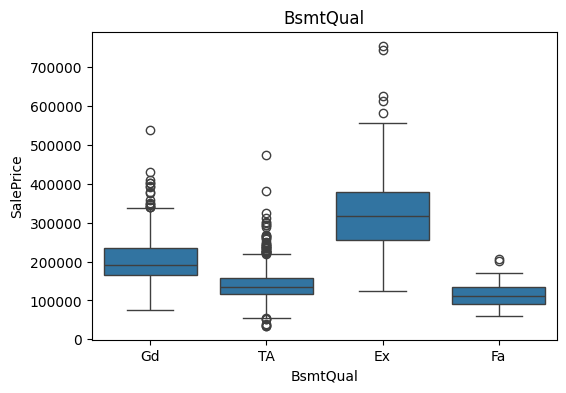

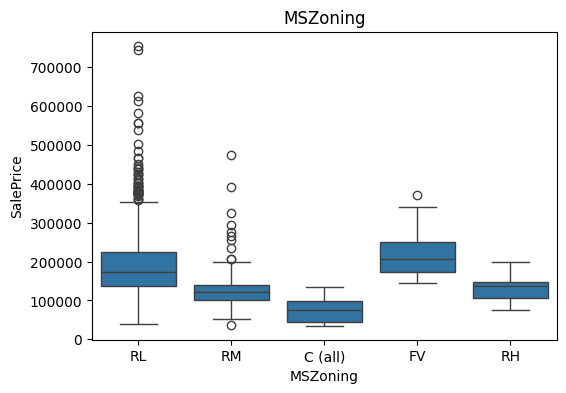

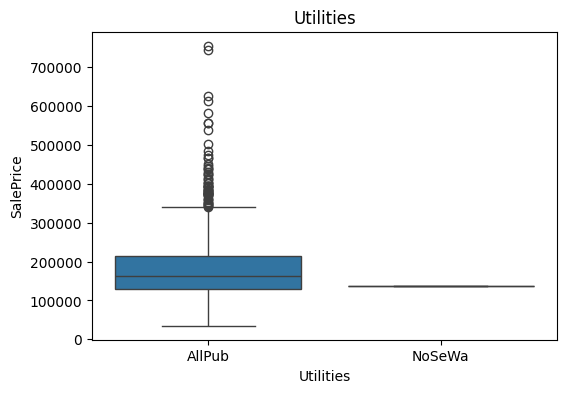

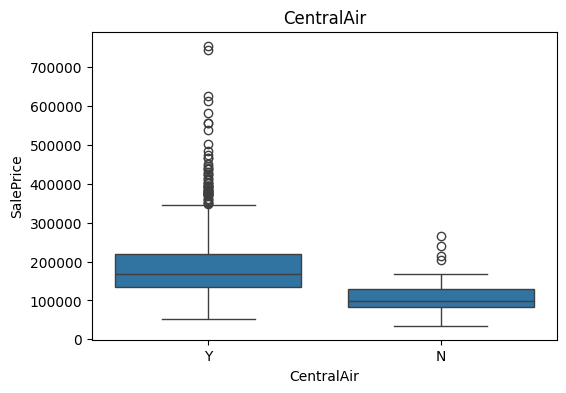

In [19]:
# boxplots for categorical features
for cat in cat_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(train_data, y='SalePrice', x=cat)
    plt.title(cat)

In [20]:
drop_cols = ['Utilities']
train_data.drop(drop_cols, inplace=True, axis=1)

In [21]:
train_data.isna().sum()

SalePrice        0
MSSubClass       0
MSZoning         0
LotArea          0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtQual        37
CentralAir       0
TotRmsAbvGrd     0
GarageType      81
dtype: int64

In [22]:
data = train_data.dropna()

In [23]:
#feature engineering
#one hot encoding for categorical variables
from sklearn.preprocessing import OneHotEncoder

ohe_features = list(set(cat_features) - set(['BsmtQual']) - set(drop_cols))
enc = OneHotEncoder(sparse_output=False)
encoded_features  = enc.fit_transform(data[ohe_features])

In [24]:
ohe_columns = enc.get_feature_names_out(ohe_features)

In [25]:
encoded_df = pd.DataFrame(encoded_features, columns=ohe_columns, index=data.index)
data = pd.concat([data, encoded_df], axis=1)


In [26]:
data.drop(ohe_features, inplace=True, axis=1)

In [27]:
data['BsmtQual'].value_counts()

BsmtQual
Gd    601
TA    595
Ex    121
Fa     32
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import OrdinalEncoder
#ordinal_data = {'Fa':1, 'TA':2, ['Gd', 3], ['Ex', 4]]
ord_enc = OrdinalEncoder()
new_df = data.copy()
new_df['BsmtQual'] = ord_enc.fit_transform(data[['BsmtQual']]).flatten()
new_df['BsmtQual']

0       2.0
1       2.0
2       2.0
3       3.0
4       2.0
       ... 
1455    2.0
1456    2.0
1457    3.0
1458    3.0
1459    3.0
Name: BsmtQual, Length: 1349, dtype: float64

In [29]:
ordinal_data = {'Fa':1, 'TA':2, 'Gd': 3, 'Ex': 4}
data['BsmtQual'] = data['BsmtQual'].map(ordinal_data)
data['BsmtQual']

0       3
1       3
2       3
3       2
4       3
       ..
1455    3
1456    3
1457    2
1458    2
1459    2
Name: BsmtQual, Length: 1349, dtype: int64

In [30]:
data.isna().sum()

SalePrice             0
MSSubClass            0
LotArea               0
OverallQual           0
OverallCond           0
YearBuilt             0
YearRemodAdd          0
BsmtQual              0
TotRmsAbvGrd          0
GarageType_2Types     0
GarageType_Attchd     0
GarageType_Basment    0
GarageType_BuiltIn    0
GarageType_CarPort    0
GarageType_Detchd     0
HouseStyle_1.5Fin     0
HouseStyle_1.5Unf     0
HouseStyle_1Story     0
HouseStyle_2.5Fin     0
HouseStyle_2.5Unf     0
HouseStyle_2Story     0
HouseStyle_SFoyer     0
HouseStyle_SLvl       0
BldgType_1Fam         0
BldgType_2fmCon       0
BldgType_Duplex       0
BldgType_Twnhs        0
BldgType_TwnhsE       0
MSZoning_C (all)      0
MSZoning_FV           0
MSZoning_RH           0
MSZoning_RL           0
MSZoning_RM           0
CentralAir_N          0
CentralAir_Y          0
dtype: int64

In [31]:
#set the target variable
target = 'SalePrice'
y = data[target]
X = data[list(set(data.columns) - set(target))]

In [32]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
#modeling
from sklearn.linear_model import LinearRegression

baseline_model  = LinearRegression()
baseline_model.fit(X_train, y_train)


LinearRegression()

In [34]:
y_pred = baseline_model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
print(f"RMSE: {mean_squared_error(y_test, y_pred)}")

RMSE: 1.2696096653926328e-21


In [46]:
y_test

316     260000
1124    163900
581     253293
377     340000
1166    245350
         ...  
575     118500
574     139000
629     168500
382     213500
559     234000
Name: SalePrice, Length: 338, dtype: int64

In [53]:
#predict on random values
import numpy as np
y_rand = pd.Series(np.random.rand(len(y_test)))
y_rand

0      0.734354
1      0.026126
2      0.273018
3      0.334057
4      0.077634
         ...   
333    0.013254
334    0.715827
335    0.576279
336    0.194766
337    0.351247
Length: 338, dtype: float64

In [54]:
print(f"RMSE: {mean_squared_error(y_test, y_rand)}")

RMSE: 37797177192.56094


In [36]:
# cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(baseline_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"CV RMSE: {cv_scores.mean()}")

CV RMSE: -7.072406767534623e-11


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators':[100, 200],
    'max_depth': [6, 10],
    'min_samples_split': [2,5]
}	

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best params: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}') 
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')



Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 290.4531911531018
RMSE: 989.971890445183


In [41]:
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
target = 'SalePrice'
y_test = test_data[target]
X_test = test_data[list(set(test_data.columns) - set(target))]

KeyError: 'SalePrice'

In [ ]:
X_test